In [1]:
import pandas as pd

dataset=pd.read_csv('Dyslexia.csv').values

data=dataset[:,1:8]
target=dataset[:,8].reshape(-1,1)

In [2]:
data[0]

array([1. , 1. , 1. , 1. , 1. , 1. , 0.8])

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler_x=MinMaxScaler(feature_range=(0,1))
data_new=scaler_x.fit_transform(data)

scaler_y=MinMaxScaler(feature_range=(0,1))
target_new=scaler_y.fit_transform(target)

In [4]:
import joblib

joblib.dump(scaler_x,'scaler_x.pkl')
joblib.dump(scaler_y,'scaler_y.pkl')

['scaler_y.pkl']

In [5]:
from sklearn.model_selection import train_test_split 

train_data,test_data,train_target,test_target=train_test_split(data_new,target_new,test_size=0.1)

In [6]:
from keras.layers import Dense,Dropout #densly connected layers
from keras.models import Sequential

model=Sequential() #model is an empty NN
#1st hidden layer (dense type-fully connected)
model.add(Dense(64,input_dim=7,activation='relu'))
model.add(Dropout(0.5))
#2nd Hidden layer
model.add(Dense(128,activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='relu',kernel_initializer='normal'))
#final layer
model.add(Dense(1,input_dim=7,activation='linear'))

model.compile(loss='mse',optimizer='adam')

2021-12-30 20:08:09.158489: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-30 20:08:09.158516: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-30 20:08:10.793635: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-30 20:08:10.793667: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-30 20:08:10.793699: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (teran-HP-Notebook): /proc/driver/nvidia/version does not exist
2021-12-30 20:08:10.793926: I tensorflow/core/platform/cpu_

In [7]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')



In [8]:
history=model.fit(train_data,train_target,epochs=1000,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/1000
230/232 [============================>.] - ETA: 0s - loss: 0.1152

2021-12-30 20:08:19.620015: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model-001.model/assets
232/232 [==============================] - 2s 8ms/step - loss: 0.1146 - val_loss: 0.0312
Epoch 2/1000
232/232 [==============================] - 2s 7ms/step - loss: 0.0404 - val_loss: 0.0196
Epoch 3/1000
232/232 [==============================] - 2s 8ms/step - loss: 0.0334 - val_loss: 0.0159
Epoch 4/1000
232/232 [==============================] - 2s 7ms/step - loss: 0.0288 - val_loss: 0.0141
Epoch 5/1000
232/232 [==============================] - 2s 8ms/step - loss: 0.0241 - val_loss: 0.0126
Epoch 6/1000
232/232 [==============================] - 2s 8ms/step - loss: 0.0204 - val_loss: 0.0105
Epoch 7/1000
232/232 [==============================] - 2s 8ms/step - loss: 0.0173 - val_loss: 0.0095
Epoch 8/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.0156 - val_loss: 0.0100
Epoch 9/1000
232/232 [==============================] - 2s 8ms/step - loss: 0.0142 - val_loss: 0.0082
Epoch 10/1000
232/232 [==============

232/232 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 56/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 57/1000
232/232 [==============================] - 2s 7ms/step - loss: 0.0045 - val_loss: 0.0023
Epoch 58/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 59/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.0040 - val_loss: 0.0024
Epoch 60/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 61/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 62/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 63/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0039 - val_loss: 0.0029
Epoch 64/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0034 - v

232/232 [==============================] - 1s 2ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 128/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 129/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 130/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 131/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 132/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 133/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 134/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 135/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 136/1000
232/232 [==============================] - 1s 2ms/step - loss: 0

232/232 [==============================] - 1s 2ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 205/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 206/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 207/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 208/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 209/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 210/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 211/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 212/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 213/1000
232/232 [==============================] - 1s 2ms/step - loss: 0

Epoch 283/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 284/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 285/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 286/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 287/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 288/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 289/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 290/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 291/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 292/1000
232/232 [==============================] - 1s 2ms

232/232 [==============================] - 2s 7ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 362/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 363/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 364/1000
232/232 [==============================] - 2s 7ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 365/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 366/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 367/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 368/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 369/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 370/1000
232/232 [==============================] - 1s 2ms/step - loss: 0

232/232 [==============================] - 1s 2ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 438/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 439/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 440/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 441/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 442/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 443/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 444/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 445/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 446/1000
232/232 [==============================] - 1s 2ms/step - loss: 0

232/232 [==============================] - 1s 2ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 515/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 516/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 517/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 518/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 519/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 520/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 521/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 522/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 523/1000
232/232 [==============================] - 1s 2ms/step - loss: 0

232/232 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 592/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 593/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 594/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 595/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 596/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 597/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 598/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 599/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 600/1000
232/232 [==============================] - 0s 2ms/step - loss: 0

232/232 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 669/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 670/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 671/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 672/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 673/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 674/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 675/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 676/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 677/1000
232/232 [==============================] - 0s 2ms/step - loss: 0

Epoch 747/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 748/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 749/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 750/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 751/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 752/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 753/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 754/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 755/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 756/1000
232/232 [==============================] - 0s 2ms

232/232 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 826/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 827/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 828/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 829/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 830/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 831/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 832/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 833/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 834/1000
232/232 [==============================] - 0s 2ms/step - loss: 0

Epoch 904/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 905/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 906/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 907/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 908/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 909/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 910/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 911/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 912/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 913/1000
232/232 [==============================] - 0s 2ms

232/232 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 982/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 983/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 984/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 985/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 986/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 987/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 988/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 989/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 990/1000
232/232 [==============================] - 1s 2ms/step - loss: 0

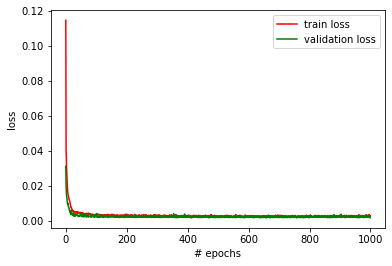

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='validation loss')
plt.legend()
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [10]:
model.load_weights('model-569.model')

2021-12-30 20:18:27.162536: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open model-569.model: FAILED_PRECONDITION: model-569.model; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [11]:
model.save_weights('model.h5')

In [12]:
results=model.predict(test_data)

In [13]:
print('Actual targets:',scaler_y.inverse_transform(test_target[:10]))
print('Predicted targets:',scaler_y.inverse_transform(results[:10]))

Actual targets: [[2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [3.]
 [1.]
 [3.]
 [3.]
 [2.]]
Predicted targets: [[2.0075479]
 [1.0058786]
 [2.0075479]
 [2.0075479]
 [2.0075479]
 [3.004294 ]
 [1.0255349]
 [3.0040863]
 [3.0052233]
 [2.0075479]]


In [14]:
from sklearn.metrics import r2_score

print('r2_score:',r2_score(test_target,results))

r2_score: 0.9881405622067515
